<a href="https://colab.research.google.com/github/mikemwai/signsense/blob/development/signsense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [34]:
import os

# Set the locale to UTF-8
os.environ['LANG'] = 'en_US.UTF-8'
os.environ['LC_ALL'] = 'en_US.UTF-8'

# Install packages
!pip install pillow gdown ultralytics tensorboard

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [32]:
!pip install pillow
!pip install gdown
!pip install ultralytics
!pip install tensorboard

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
import gdown
import zipfile
import random
from sklearn.model_selection import train_test_split
from PIL import Image, ExifTags
from google.colab import drive
from IPython.display import Image, display
from ultralytics import YOLO
from glob import glob

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Import Dataset

## Downloading the dataset

### In Google Drive it's `old_dataset.zip`

In [ ]:
file_id = "17IVVPdQAQDL0MfaD4ftKyoiJgB2fIYLh"

url = f"https://drive.google.com/uc?id={file_id}"

output = "kaggle_dataset.zip"

gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

print("Folder extracted.")

Downloading...
From (original): https://drive.google.com/uc?id=17IVVPdQAQDL0MfaD4ftKyoiJgB2fIYLh
From (redirected): https://drive.google.com/uc?id=17IVVPdQAQDL0MfaD4ftKyoiJgB2fIYLh&confirm=t&uuid=0df8a314-bf7c-4d8b-9a61-df395e21c33d
To: /content/kaggle_dataset.zip

  0%|          | 0.00/323M [00:00<?, ?B/s]
  4%|▍         | 12.6M/323M [00:00<00:02, 124MB/s]
 11%|█         | 34.1M/323M [00:00<00:02, 144MB/s]
 16%|█▌        | 50.9M/323M [00:00<00:01, 148MB/s]
 23%|██▎       | 74.4M/323M [00:00<00:01, 179MB/s]
 29%|██▊       | 92.8M/323M [00:00<00:02, 112MB/s]
 35%|███▌      | 114M/323M [00:00<00:01, 134MB/s] 
 40%|████      | 131M/323M [00:00<00:01, 137MB/s]
 45%|████▌     | 146M/323M [00:01<00:01, 142MB/s]
 50%|█████     | 162M/323M [00:01<00:01, 139MB/s]
 55%|█████▍    | 177M/323M [00:01<00:01, 141MB/s]
 62%|██████▏   | 199M/323M [00:01<00:00, 162MB/s]
 68%|██████▊   | 219M/323M [00:01<00:00, 170MB/s]
 74%|███████▎  | 238M/323M [00:01<00:00, 177MB/s]
 79%|███████▉  | 256M/323M [00:01<0

Folder extracted.


### In Google Drive it's `yolo_format_dataset.zip`

In [ ]:
file_id = "19tAzaqINGsNqI4Gk91bLVpl5xlhBrun1"

url = f"https://drive.google.com/uc?id={file_id}"

output = "roboflow_dataset.zip"

gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

print("Folder extracted.")

Downloading...
From (original): https://drive.google.com/uc?id=19tAzaqINGsNqI4Gk91bLVpl5xlhBrun1
From (redirected): https://drive.google.com/uc?id=19tAzaqINGsNqI4Gk91bLVpl5xlhBrun1&confirm=t&uuid=2818542d-8d0e-493f-b844-56897ecedcab
To: /content/roboflow_dataset.zip

  0%|          | 0.00/571M [00:00<?, ?B/s]
  1%|          | 4.72M/571M [00:00<00:33, 17.0MB/s]
  3%|▎         | 17.3M/571M [00:00<00:16, 33.4MB/s]
  6%|▌         | 34.1M/571M [00:00<00:12, 42.1MB/s]
  9%|▉         | 50.9M/571M [00:01<00:10, 48.7MB/s]
 12%|█▏        | 67.6M/571M [00:01<00:09, 50.5MB/s]
 15%|█▍        | 84.4M/571M [00:01<00:09, 51.9MB/s]
 18%|█▊        | 101M/571M [00:02<00:09, 52.0MB/s] 
 21%|██        | 118M/571M [00:02<00:08, 54.0MB/s]
 24%|██▎       | 135M/571M [00:02<00:07, 55.9MB/s]
 27%|██▋       | 152M/571M [00:02<00:07, 55.7MB/s]
 29%|██▉       | 168M/571M [00:03<00:07, 56.3MB/s]
 34%|███▍      | 193M/571M [00:03<00:05, 64.5MB/s]
 37%|███▋      | 210M/571M [00:03<00:04, 76.7MB/s]
 38%|███▊      | 22

Folder extracted.


### In Google Drive it's `image_dataset.zip`

In [ ]:
file_id = "1e93Y55P-iuGBxCiuRZ0iTFNf98rWohmP"

url = f"https://drive.google.com/uc?id={file_id}"

output = "image_dataset.zip"

gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

print("Folder extracted.")

Downloading...
From (original): https://drive.google.com/uc?id=1e93Y55P-iuGBxCiuRZ0iTFNf98rWohmP
From (redirected): https://drive.google.com/uc?id=1e93Y55P-iuGBxCiuRZ0iTFNf98rWohmP&confirm=t&uuid=b004499e-5879-442f-ae72-772cec4f92b9
To: /content/image_dataset.zip
100%|██████████| 891M/891M [00:15<00:00, 58.0MB/s]


Folder extracted.


### In Google Drive it's `dataset.zip`

In [3]:
file_id = "1soWNFDxqChdVfuk5iiUF56UCoNdfKLr5"

url = f"https://drive.google.com/uc?id={file_id}"

output = "image_dataset.zip"

gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

print("Folder extracted.")

Downloading...
From (original): https://drive.google.com/uc?id=1soWNFDxqChdVfuk5iiUF56UCoNdfKLr5
From (redirected): https://drive.google.com/uc?id=1soWNFDxqChdVfuk5iiUF56UCoNdfKLr5&confirm=t&uuid=f6f87ad1-9bf2-417f-aa26-aa43f26d82ee
To: /content/image_dataset.zip
100%|██████████| 323M/323M [00:13<00:00, 23.1MB/s]


Folder extracted.


## Checking for any errors in the dataset

In [ ]:
!unzip -t combined_dataset.zip

Archive:  combined_dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of combined_dataset.zip or
        combined_dataset.zip.zip, and cannot find combined_dataset.zip.ZIP, period.


## Extracting the zip folder

In [ ]:
z = zipfile.ZipFile('dataset.zip')
z.extractall()
print("Extraction complete!")

Extraction complete!


# Dataset Splitting

### Splitting into train, test and valid folders

In [ ]:
dataset_dir = 'combined_dataset'

train_ratio = 0.7
test_ratio = 0.2
val_ratio = 0.1

splits = ['train', 'valid', 'test']
output_dir = 'dataset_split'
os.makedirs(output_dir, exist_ok=True)
for split in splits:
    for category in os.listdir(dataset_dir):
        os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)

for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)

    images = os.listdir(category_path)

    train_images, test_images = train_test_split(images, test_size=(test_ratio + val_ratio))
    val_images, test_images = train_test_split(test_images, test_size=test_ratio/(test_ratio + val_ratio))

    def copy_images(image_list, split):
        for image in image_list:
            src = os.path.join(category_path, image)
            dst = os.path.join(output_dir, split, category, image)
            shutil.copyfile(src, dst)

    copy_images(train_images, 'train')
    copy_images(val_images, 'valid')
    copy_images(test_images, 'test')

print("Dataset split into train, valid, and test sets successfully!")

Dataset split into train, valid, and test sets successfully!


### Splitting the dataset based on the classes

In [ ]:
class_names = ['church', 'enough', 'friend', 'love', 'me', 'mosque', 'seat', 'temple', 'you']

image_directories = ['./dataset/train/images', './dataset/valid/images', './dataset/test/images']
label_directories = ['./dataset/train/labels', './dataset/valid/labels', './dataset/test/labels']

output_directory = './sorted_by_class'

for class_name in class_names:
    class_folder = os.path.join(output_directory, class_name)
    os.makedirs(class_folder, exist_ok=True)

for img_dir, lbl_dir in zip(image_directories, label_directories):
    for label_file in os.listdir(lbl_dir):
        label_path = os.path.join(lbl_dir, label_file)
        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            class_id = int(line.split()[0])

            img_file = label_file.replace('.txt', '.jpg')
            img_path = os.path.join(img_dir, img_file)

            if os.path.exists(img_path):
                dest_folder = os.path.join(output_directory, class_names[class_id])
                shutil.copy(img_path, dest_folder)

## Compressing the new dataset folder to a zip file

In [ ]:
folder_to_zip = 'combined_yolo_dataset'

output_zip_file = 'combined_yolo_dataset.zip'

shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_zip)

print(f"Folder '{folder_to_zip}' has been successfully compressed into '{output_zip_file}'")

Folder 'combined_yolo_dataset' has been successfully compressed into 'combined_yolo_dataset.zip'


## Deleting any folder

In [ ]:
shutil.rmtree('yolo_format_dataset')

In [ ]:
dataset_dir = 'combined_dataset'

splits = ['train', 'valid', 'test']

for split in splits:
    split_dir = os.path.join(dataset_dir, split)
    if os.path.exists(split_dir):
        for category in os.listdir(split_dir):
            category_path = os.path.join(split_dir, category)
            if os.path.isdir(category_path):
                images = os.listdir(category_path)
                print(f"Found {len(images)} images for class {category} in {split} set")
            else:
                print(f"No images found for class {category} in {split} set")
    else:
        print(f"Directory {split_dir} does not exist.")

Found 932 images for class Mosque in train set
Found 948 images for class You in train set
Found 976 images for class Church in train set
Found 954 images for class Seat in train set
Found 972 images for class Temple in train set
Found 972 images for class Me in train set
Found 984 images for class Love in train set
Found 974 images for class Enough (Satisfied) in train set
Found 960 images for class Friend in train set
Found 312 images for class Mosque in valid set
Found 288 images for class You in valid set
Found 276 images for class Church in valid set
Found 292 images for class Seat in valid set
Found 268 images for class Temple in valid set
Found 256 images for class Me in valid set
Found 264 images for class Love in valid set
Found 276 images for class Enough (Satisfied) in valid set
Found 288 images for class Friend in valid set
Found 146 images for class Mosque in test set
Found 152 images for class You in test set
Found 136 images for class Church in test set
Found 144 images 

## Converting the kaggle dataset to a YOLO format

In [ ]:
original_dataset_path = 'combined_dataset'
output_path = 'yolo_format_dataset'

classes = ['Church', 'Enough (Satisfied)', 'Friend', 'Love', 'Me', 'Mosque', 'Seat', 'Temple', 'You']

os.makedirs(os.path.join(output_path, 'train/images'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'train/labels'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'valid/images'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'valid/labels'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'test/images'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'test/labels'), exist_ok=True)

split_folders = ['train', 'valid', 'test']

def process_images(class_name, img_files, phase):
    if not img_files:
        print(f"No images found for class {class_name} in {phase} phase!")
        return

    print(f"Processing {len(img_files)} images for {phase} phase in class {class_name}.")
    for img_file in img_files:
        img_name = os.path.basename(img_file)
        shutil.copy(img_file, os.path.join(output_path, f'{phase}/images', img_name))

        label_file = os.path.join(output_path, f'{phase}/labels', img_name.replace('.jpg', '.txt'))

        with open(label_file, 'w') as f:
            f.write("")

for class_name in classes:
    for phase in split_folders:
        class_path = os.path.join(original_dataset_path, phase, class_name)
        img_files = glob(os.path.join(class_path, '*.*'))

        print(f"Found {len(img_files)} images for class {class_name} in {phase} phase.")
        process_images(class_name, img_files, phase)

yaml_content = f"""
train: {output_path}/train/images
val: {output_path}/valid/images
test: {output_path}/test/images

nc: {len(classes)}  # Number of classes
names: {classes}  # Class names
"""

yaml_path = os.path.join(output_path, 'dataset.yaml')
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print("Dataset successfully converted to YOLO format!")

Found 976 images for class Church in train phase.
Processing 976 images for train phase in class Church.
Found 276 images for class Church in valid phase.
Processing 276 images for valid phase in class Church.
Found 136 images for class Church in test phase.
Processing 136 images for test phase in class Church.
Found 0 images for class Enough (Satisfied) in train phase.
No images found for class Enough (Satisfied) in train phase!
Found 0 images for class Enough (Satisfied) in valid phase.
No images found for class Enough (Satisfied) in valid phase!
Found 0 images for class Enough (Satisfied) in test phase.
No images found for class Enough (Satisfied) in test phase!
Found 960 images for class Friend in train phase.
Processing 960 images for train phase in class Friend.
Found 288 images for class Friend in valid phase.
Processing 288 images for valid phase in class Friend.
Found 140 images for class Friend in test phase.
Processing 140 images for test phase in class Friend.
Found 984 ima

# Exploratory Data Analysis

### Image Dataset

In [13]:
total_images = 0

for root, dirs, files in os.walk("dataset"):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            total_images += 1

print(f'{total_images} images')

6233 images


In [14]:
test_images = 0
train_images = 0
valid_images = 0

for root, dirs, files in os.walk("dataset"):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            if 'test' in root:
                test_images += 1
            elif 'train' in root:
                train_images += 1
            elif 'valid' in root:
                valid_images += 1

print(f'test: {test_images} images')
print(f'train: {train_images} images')
print(f'valid: {valid_images} images')

test: 409 images
train: 5005 images
valid: 819 images


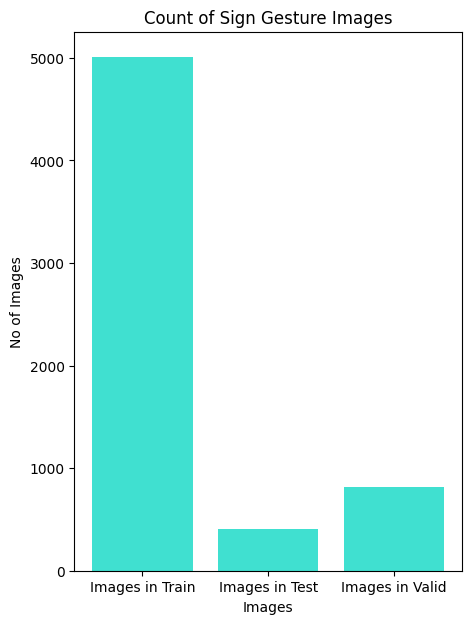

In [15]:
data = {'Images in Train': train_images, 'Images in Test': test_images, 'Images in Valid': valid_images}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="turquoise")

plt.xlabel("Images")
plt.ylabel("No of Images")
plt.title("Count of Sign Gesture Images")
plt.show()

### Video Dataset

In [ ]:
total_videos = 0

for root, dirs, files in os.walk("dataset_split"):
    for file in files:
        if file.endswith(('.mp4', '.avi', '.mkv', '.MOV', '.wmv')):
            total_videos += 1

print(f'{total_videos} videos')

0 videos


In [ ]:
test_videos = 0
train_videos = 0
valid_videos = 0

for root, dirs, files in os.walk("dataset_split"):
    for file in files:
        if file.endswith(('.mp4', '.avi', '.mkv', '.MOV', '.wmv')):
            if 'test' in root:
                test_videos += 1
            elif 'train' in root:
                train_videos += 1
            elif 'valid' in root:
                valid_videos += 1

print(f'test: {test_videos} videos')
print(f'train: {train_videos} videos')
print(f'valid: {valid_videos} videos')

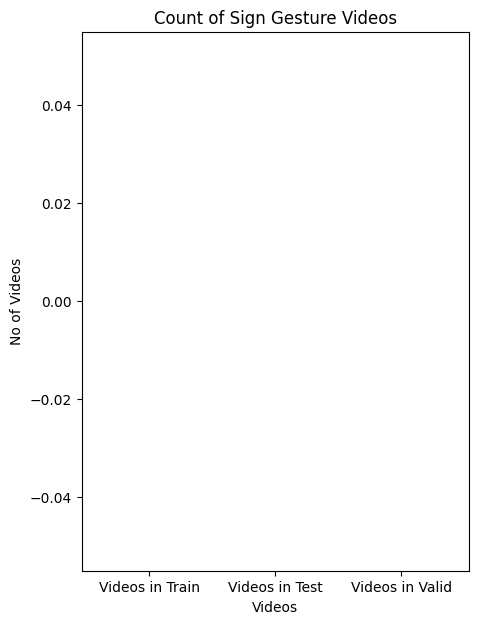

In [ ]:
data = {'Videos in Train': train_videos, 'Videos in Test': test_videos, 'Videos in Valid': valid_videos}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="turquoise")

plt.xlabel("Videos")
plt.ylabel("No of Videos")
plt.title("Count of Sign Gesture Videos")
plt.show()

# Data Preprocessing

In [ ]:
input_dir = 'splitted_dataset'
output_dir = 'preprocessed_dataset'

os.makedirs(output_dir, exist_ok=True)

def preprocess_image(image_path, output_path, size=(640, 640)):
    try:
        with Image.open(image_path) as img:
            try:
                for orientation in ExifTags.TAGS.keys():
                    if ExifTags.TAGS[orientation] == 'Orientation':
                        break
                exif = img._getexif()
                if exif is not None:
                    orientation = exif[orientation]
                    if orientation == 3:
                        img = img.rotate(180, expand=True)
                    elif orientation == 6:
                        img = img.rotate(270, expand=True)
                    elif orientation == 8:
                        img = img.rotate(90, expand=True)
            except (AttributeError, KeyError, IndexError):
                pass

            img = img.resize(size)

            img.save(output_path)

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

for root, dirs, files in os.walk(input_dir):
    for file in files:
        image_path = os.path.join(root, file)

        if "_jpg.rf." in file:
            print(f"Skipping already preprocessed Roboflow image: {image_path}")
            continue

        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            relative_path = os.path.relpath(root, input_dir)
            output_subfolder = os.path.join(output_dir, relative_path)
            os.makedirs(output_subfolder, exist_ok=True)

            output_image_path = os.path.join(output_subfolder, file)

            preprocess_image(image_path, output_image_path)
        else:
            print(f"Skipping non-image file: {image_path}")

print("Preprocessing complete.")

Streaming output truncated to the last 5000 lines.
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_CCAR78WY_jpg.rf.57abd3cf7776621b748d37a61726bb66.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_R3BGBNKQ_jpg.rf.14b79b260b4b261a22c625452d11ecd1.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_JGC23UW5_jpg.rf.42c6f773de440ec2983caf6f2a430383.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_Y0EL310P_jpg.rf.6c892138122e0b16ae9beb4a2f2cc1ed.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_4398FTMN_jpg.rf.4f844f73bd2e68de202d8354995c50c6.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_T2AFXHNL_jpg.rf.e6c39ae53bec1405d5daede2380b6bb1.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_YCKQA8KF_jpg.rf.2987d65d34eb1a86945f3c5968a04d9a.j

# Data Augmentation

In [ ]:
input_dir = 'preprocessed_dataset'
output_dir = 'augmented_dataset'

os.makedirs(output_dir, exist_ok=True)

def augment_image(image_path, output_path):
    try:
        with Image.open(image_path) as img:
            flipped_img = img.transpose(method=Image.FLIP_LEFT_RIGHT)
            flipped_img.save(output_path)

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

for root, dirs, files in os.walk(input_dir):
    for file in files:
        image_path = os.path.join(root, file)

        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            relative_path = os.path.relpath(root, input_dir)
            output_subfolder = os.path.join(output_dir, relative_path)
            os.makedirs(output_subfolder, exist_ok=True)

            output_image_path = os.path.join(output_subfolder, f"flipped_{file}")

            augment_image(image_path, output_image_path)
        else:
            print(f"Skipping non-image file: {image_path}")

print("Data augmentation complete.")

Data augmentation complete.


In [ ]:
dataset1_path = 'old_dataset'
dataset2_path = 'yolo_format_dataset'

combined_output_path = 'combined_yolo_dataset'

for split in ['train', 'valid', 'test']:
    os.makedirs(os.path.join(combined_output_path, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(combined_output_path, split, 'labels'), exist_ok=True)

def merge_datasets(split):
    for dataset_path in [dataset1_path, dataset2_path]:
        image_files = glob(os.path.join(dataset_path, split, 'images', '*.*'))
        for img_file in image_files:
            img_name = os.path.basename(img_file)
            new_img_name = f"{os.path.basename(dataset_path)}_{img_name}"
            shutil.copy(img_file, os.path.join(combined_output_path, split, 'images', new_img_name))

        label_files = glob(os.path.join(dataset_path, split, 'labels', '*.txt'))
        for label_file in label_files:
            label_name = os.path.basename(label_file)
            new_label_name = f"{os.path.basename(dataset_path)}_{label_name}"
            shutil.copy(label_file, os.path.join(combined_output_path, split, 'labels', new_label_name))

for split in ['train', 'valid', 'test']:
    merge_datasets(split)

dataset1_yaml = os.path.join(dataset1_path, 'data.yaml')
dataset2_yaml = os.path.join(dataset2_path, 'dataset.yaml')

with open(dataset1_yaml, 'r') as f:
    yaml_content = f.read()

yaml_combined_path = os.path.join(combined_output_path, 'dataset.yaml')
with open(yaml_combined_path, 'w') as f:
    f.write(yaml_content)

print("Datasets successfully merged!")

Datasets successfully merged!


## Model Building

In [7]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 275MB/s]


### Run inference/ prediction on a sample image

100%|██████████| 49.2k/49.2k [00:00<00:00, 28.9MB/s]


image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 95.8ms
Speed: 11.1ms preprocess, 95.8ms inference, 732.4ms postprocess per image at shape (1, 3, 384, 640)


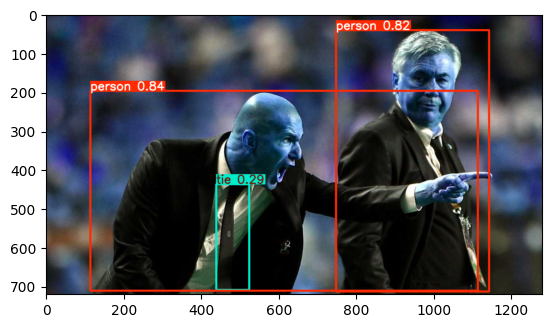

In [8]:
results = model('https://ultralytics.com/images/zidane.jpg')
for result in results:
    plt.imshow(result.plot())
    plt.show()

### Access Predictions

In [9]:
for result in results:
    print(result.boxes.xyxy)
    print(result.boxes.conf)
    print(result.boxes.cls)

tensor([[ 114.8700,  197.4120, 1114.4689,  711.8894],
        [ 748.4614,   41.8552, 1143.0757,  713.0239],
        [ 439.4747,  437.0735,  524.3459,  709.1597]], device='cuda:0')
tensor([0.8360, 0.8190, 0.2910], device='cuda:0')
tensor([ 0.,  0., 27.], device='cuda:0')


### Train on a custom dataset

In [24]:
model.train(data='./dataset/data.yaml', epochs=20, imgsz=640, batch=16)

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./dataset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=False, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

train: Scanning /content/dataset/train/labels.cache... 5005 images, 46 backgrounds, 0 corrupt: 100%|██████████| 5005/5005 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/valid/labels.cache... 819 images, 9 backgrounds, 0 corrupt: 100%|██████████| 819/819 [00:00<?, ?it/s]


Plotting labels to runs/detect/train9222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train9222
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.44G     0.8298     0.8682      1.334         30        640: 100%|██████████| 313/313 [02:26<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.11it/s]


                   all        819        811      0.921      0.901      0.914      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.32G     0.9832      1.019      1.431         28        640: 100%|██████████| 313/313 [01:52<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]

                   all        819        811      0.903      0.927      0.925      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.32G      1.003       1.07      1.446         30        640: 100%|██████████| 313/313 [01:52<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.66it/s]

                   all        819        811      0.904      0.904      0.916       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.32G      0.998      1.048      1.438         26        640: 100%|██████████| 313/313 [01:51<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.00it/s]

                   all        819        811      0.913        0.9      0.922        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.32G     0.9768      1.022       1.42         32        640: 100%|██████████| 313/313 [01:52<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]

                   all        819        811      0.908      0.896       0.92       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.32G     0.9731      1.015      1.418         28        640: 100%|██████████| 313/313 [01:59<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.11it/s]

                   all        819        811       0.92      0.909      0.927      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.32G     0.9646     0.9866      1.415         34        640: 100%|██████████| 313/313 [01:58<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.50it/s]


                   all        819        811       0.92      0.921      0.925      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.32G       0.94     0.9674      1.397         29        640: 100%|██████████| 313/313 [02:03<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.04it/s]

                   all        819        811       0.91      0.927      0.919      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.32G     0.9365     0.9272        1.4         26        640: 100%|██████████| 313/313 [02:05<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.74it/s]

                   all        819        811      0.902      0.914      0.923      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.32G     0.9189     0.9194      1.382         30        640: 100%|██████████| 313/313 [01:55<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.54it/s]

                   all        819        811      0.928      0.926      0.931      0.613


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.32G     0.8796     0.5766       1.51         13        640: 100%|██████████| 313/313 [01:53<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.16it/s]

                   all        819        811      0.922      0.923      0.927      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.32G     0.8498     0.5247      1.477         12        640: 100%|██████████| 313/313 [01:51<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.54it/s]

                   all        819        811      0.913       0.91      0.924      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.32G     0.8306     0.5126      1.467         13        640: 100%|██████████| 313/313 [01:49<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.82it/s]

                   all        819        811      0.925      0.919      0.923      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.32G      0.813     0.5018      1.445         12        640: 100%|██████████| 313/313 [01:49<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.96it/s]

                   all        819        811      0.925      0.927      0.931      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.32G     0.7822     0.4786      1.424         12        640: 100%|██████████| 313/313 [01:48<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  3.99it/s]

                   all        819        811      0.926      0.928      0.932        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.32G     0.7616     0.4668      1.406         13        640: 100%|██████████| 313/313 [01:44<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.59it/s]

                   all        819        811      0.928      0.928      0.927      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.32G     0.7664     0.4652      1.401         13        640: 100%|██████████| 313/313 [01:44<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:07<00:00,  3.62it/s]

                   all        819        811      0.922       0.93      0.928      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.32G     0.7396     0.4493       1.38         13        640: 100%|██████████| 313/313 [02:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.20it/s]

                   all        819        811      0.923      0.921      0.925      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.32G     0.7255     0.4416      1.373         12        640: 100%|██████████| 313/313 [02:04<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.26it/s]

                   all        819        811      0.925      0.927      0.931       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.32G     0.7154     0.4356      1.357         13        640: 100%|██████████| 313/313 [01:45<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        819        811      0.927      0.931      0.932       0.61



20 epochs completed in 0.695 hours.
Optimizer stripped from runs/detect/train9222/weights/last.pt, 5.6MB


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f8fc931a770>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

## Model Validation

In [25]:
results = model.val(data='./dataset/data.yaml')
print(results)  # Print evaluation metrics

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,686,123 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning /content/dataset/valid/labels.cache... 819 images, 9 backgrounds, 0 corrupt: 100%|██████████| 819/819 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:15<00:00,  3.43it/s]


                   all        819        811      0.927      0.931      0.932      0.611
                church         73         74      0.916      0.905      0.911      0.685
                enough        100        100      0.896       0.93      0.941      0.663
                friend         99         99      0.961      0.939      0.965      0.743
                  love         96         96      0.928      0.947      0.958      0.734
                    me        101        101      0.918      0.889      0.884      0.427
                mosque         83         83      0.941      0.928      0.913      0.638
                  seat         81         81       0.94      0.966      0.966      0.551
                temple         75         75       0.92       0.92      0.915      0.653
                   you        102        102      0.923      0.951      0.938      0.401
Speed: 0.4ms preprocess, 4.7ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect

In [26]:
!tensorboard --logdir runs/detect/train92

SyntaxError: invalid syntax (<ipython-input-26-6e68d9bf8128>, line 1)

In [35]:
results = model.predict(source='/content/dataset/test/images/ImageID_2Q61PJ0A_jpg.rf.a00f34d526db7127bc3849907b0e9a7a.jpg', save=True)  # Save output images with predictions


image 1/1 /content/dataset/test/images/ImageID_2Q61PJ0A_jpg.rf.a00f34d526db7127bc3849907b0e9a7a.jpg: 640x640 1 person, 1 bed, 34.1ms
Speed: 3.3ms preprocess, 34.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train92223


In [36]:
model.save('best_model.pt')

In [ ]:
results = model.predict(source='/content/dataset/test/images/ImageID_2Q61PJ0A_jpg.rf.a00f34d526db7127bc3849907b0e9a7a.jpg', show=True)  # Show predictions

In [ ]:
# Load the best model for inference
best_model = YOLO('best_model.pt')

# Test on a single image
results = best_model.predict(source='path/to/test/image.jpg', save=True)

# Test on a batch of images or a video
results_batch = best_model.predict(source='path/to/test/images_or_video', save=True)

# Print predictions
for result in results_batch:
    print(result)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the metrics from the training log CSV file
log_path = 'runs/detect/train/metrics.csv'  # Adjust the path based on your training run
metrics = pd.read_csv(log_path)

# Plotting precision, recall, and mAP
plt.figure(figsize=(15, 5))

# Precision
plt.subplot(1, 3, 1)
plt.plot(metrics['epoch'], metrics['metrics/precision(B)'], label='Precision', color='blue')
plt.title('Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()

# Recall
plt.subplot(1, 3, 2)
plt.plot(metrics['epoch'], metrics['metrics/recall(B)'], label='Recall', color='orange')
plt.title('Recall over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.grid(True)
plt.legend()

# mAP
plt.subplot(1, 3, 3)
plt.plot(metrics['epoch'], metrics['metrics/mAP50(B)'], label='mAP@0.5', color='green')
plt.plot(metrics['epoch'], metrics['metrics/mAP50-95(B)'], label='mAP@0.5:0.95', color='red')
plt.title('mAP over Epochs')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/train/metrics.csv'

In [ ]:
model.export(format='onnx')